In [96]:
import pandas as pd

In [97]:
#filen="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/09_06_2022_motif_scanning/mooods_run/clustered_overlaps_resolved_based_on_cwm_activations_normed.bed"
#filen="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/09_06_2022_motif_scanning/clustered_overlaps_resolved_based_on_cwm_activations_normed.bed"
filen="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_05.13.2022_bias_128_4_1234_0.5_fold_0/09_06_2022_motif_scanning/mooods_dir_eith_atac/clustered_overlaps_resolved_based_on_cwm_activations_normed.bed" 



In [98]:
data = pd.read_csv(filen,sep="\t",header=None)
#print(data.head())
cluster_sizes = data.groupby([10]).size()

In [99]:
import matplotlib.pyplot as plt

(array([8.06657346e-01, 2.10888090e-01, 6.58644564e-02, 1.99121230e-02,
        5.77191931e-03, 1.53118967e-03, 3.82797417e-04, 8.65455030e-05,
        1.33146928e-05, 3.32867319e-06]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

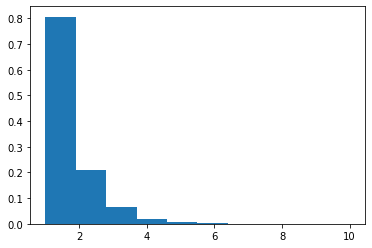

In [100]:
plt.hist(cluster_sizes,bins=10,cumulative=False,density=True)

In [101]:
import numpy as np
np.median(cluster_sizes)

1.0

In [102]:
data["index"] = data[0]+"_"+data[1].astype(str)+"_"+data[2].astype(str)+"_"+data[3].astype(str)

In [103]:
data_n = data[[10,"index"]]

In [104]:
data_n.shape

(464824, 2)

In [105]:
data_n["index"] = data_n[[10,"index"]].groupby([10])["index"].transform(lambda x: ','.join(x))
data_n[[10,"index"]].drop_duplicates()

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,10,index
0,1,chr1_40751_40758_0_5_NFYB_HUMAN.H11MO.0.A
1,2,chr1_42236_42241_0_0_GATA3_GATA_1
2,3,chr1_42279_42289_0_3_BACH2_HUMAN.H11MO.0.A
3,4,chr1_42334_42339_0_0_GATA3_GATA_1
4,5,chr1_46905_46912_0_4_ELK1_ETS_1
...,...,...
464818,333796,chrX_156016598_156016606_0_6_ETV4_MOUSE.H11MO.0.B
464819,333797,"chrX_156016890_156016904_0_1_CTCF_MA0139.1,chr..."
464821,333798,chrX_156025544_156025553_0_2_KLF3_HUMAN.H11MO.0.B
464822,333799,chrX_156026007_156026022_0_14_NFIC_HUMAN.H11MO...


In [106]:
dictionary_f = {}
for i,r in data_n.iterrows():
    footprints = r["index"].split(",")
    if len(footprints) < 5:
        footprint_len = len(footprints)
    else:
        footprint_len = 5
    if footprint_len not in dictionary_f:
        dictionary_f[footprint_len] = []
    dictionary_f[footprint_len].append(r["index"])

In [107]:
dictionary_f.keys()

dict_keys([1, 2, 5, 3, 4])

In [108]:
import pyBigWig

#cts_bw_file="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/nautilus_runs/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/interpret/K562_wo_bias.bw"
cts_bw_file="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/nautilus_runs_may18/K562_05.13.2022_bias_128_4_1234_0.5_fold_0/interpret/K562_wo_bias.bw"
#cts_bw_file="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/HEPG2/nautilus_runs_jun16/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/interpret/HEPG2_wo_bias.bw"
bias_corrected_bw = pyBigWig.open(cts_bw_file)



In [109]:
import scipy.stats as stats
footprint_bins = {}
for key in  dictionary_f:
    if key not in footprint_bins:
        footprint_bins[key] = []
    for value in dictionary_f[key]:
        motif_locs = value.split(",")
        mins=10e100
        maxs=-1
        for x in motif_locs:
            start = int(x.split("_")[1])
            end = int(x.split("_")[2])
            chrm = x.split("_")[0]
            
            if start<mins:
                mins=start
                
            if end>maxs:
                maxs=end
            
        midpoint = int((maxs+mins)/2)
        if (maxs-mins) > 200:
            print(chrm,mins,maxs)
        footprint_val = np.nan_to_num(bias_corrected_bw.values(chrm,midpoint-500,midpoint+500))
        footprint_val = footprint_val
        zdval = stats.zscore(footprint_val)
        footprint_bins[key].append(zdval[400:600])


chr16 89241060 89241277
chr16 89241060 89241277
chr16 89241060 89241277
chr16 89241060 89241277
chr16 89241060 89241277
chr16 89241060 89241277
chr16 89241060 89241277
chr16 89241060 89241277
chr19 35305972 35306188
chr19 35305972 35306188
chr19 35305972 35306188
chr19 35305972 35306188
chr19 35305972 35306188
chr19 35305972 35306188
chr20 58542201 58542463
chr20 58542201 58542463
chr20 58542201 58542463
chr20 58542201 58542463
chr20 58542201 58542463
chr20 58542201 58542463
chr20 58542201 58542463
chr20 58542201 58542463
chr20 63751610 63751856
chr20 63751610 63751856
chr20 63751610 63751856
chr20 63751610 63751856
chr20 63751610 63751856
chr20 63751610 63751856
chr20 63751610 63751856
chr20 63751610 63751856
chr20 63751610 63751856
chr21 31947146 31947384
chr21 31947146 31947384
chr21 31947146 31947384
chr21 31947146 31947384
chr21 31947146 31947384
chr21 31947146 31947384
chr21 31947146 31947384
chr6 6687034 6687262
chr6 6687034 6687262
chr6 6687034 6687262
chr6 6687034 6687262
chr6

In [110]:
footprint_bins.keys()

dict_keys([1, 2, 5, 3, 4])

26
52
68
3
2


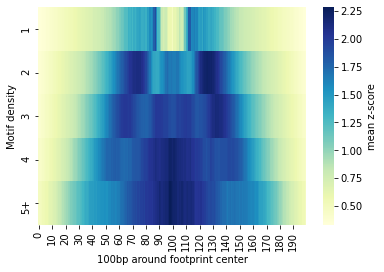

In [111]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt 
import seaborn as sns


outputs = []
for key in [1, 2, 3, 4, 5]:
    output = np.mean(np.array(footprint_bins[key]),axis=0)
    left = np.argmax(output[0:100])
    right = np.argmax(output[100:200])
    
    print(100+right-left)
    #indsl = np.where(output[0:100]>(output[left]*0.5))[0]
    #indsr = np.where(output[100:200]>(output[right]*0.5))[0]
        
    #print(-np.min(indsl)+(100+np.max(indsr)))
    #print(-np.max(indsl)+(100+np.min(indsr)))

    outputs.append(output)
plt.figure()
ax = sns.heatmap(outputs,cmap="YlGnBu",yticklabels=[1, 2, 3, 4, "5+"], xticklabels=10, cbar_kws={'label': 'mean z-score'})
plt.xlabel('100bp around footprint center')
plt.ylabel('Motif density')
plt.savefig("subfigs/footprint_width_motif_density_dnase_k562.pdf", dpi=300, transparent=True)

plt.show()
    
    
    

In [ ]:
#data.groupby(by=[10]).sum()